<a href="https://colab.research.google.com/github/aovladi/cs480student/blob/main/05/CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

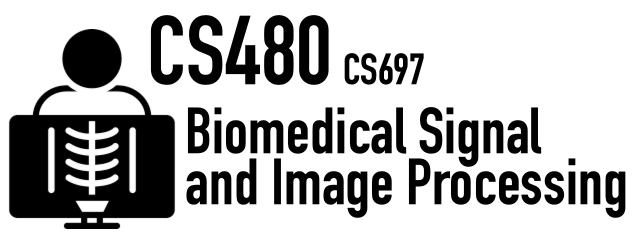
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 1.9MB 7.9MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [3]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [4]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [5]:
# TODO: 220 (220 items are in the ct folder)

In [6]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [7]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

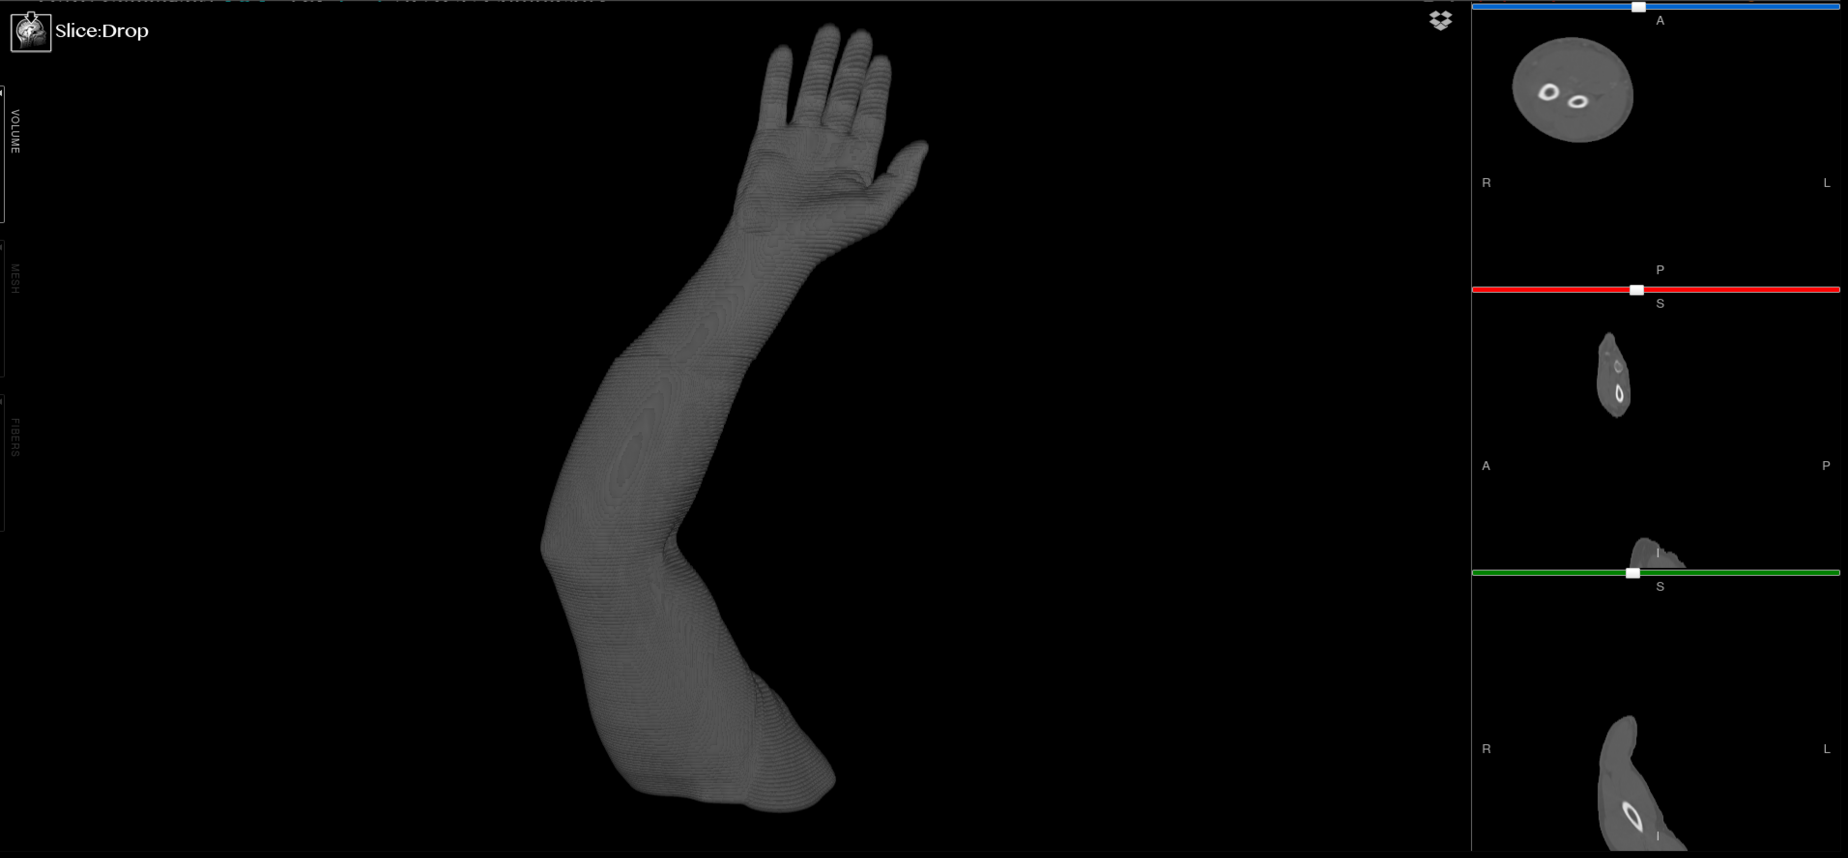

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [245]:
# helper function for plotting 
def plotct(stack, rows=1, cols=4, 
           start_with=85, show_every=5,
           axis = 0, aspect=None,
           intercept = 0, vmin=None, 
           vmax = None, sizex = 20, sizey = 20):
  
    fig,axs = plt.subplots(rows,cols, figsize=[sizex,sizey])
    
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax = axs[i%cols] if rows < 2 else axs[i//cols, i%cols]
        ax.set_title("slice {}".format(ind), fontsize=18)
        if axis == 0:
          ax.imshow(stack[ind,:,:].T + intercept,cmap='gray', vmin=vmin,vmax=vmax)
        elif axis ==1:
          ax.imshow(stack[:,ind,:]+ intercept,cmap='gray', vmin=vmin,vmax=vmax)
        else:
          ax.imshow(stack[:,:, ind]+ intercept,cmap='gray', vmin=vmin,vmax=vmax)
        ax.axis('off')
        if aspect != None:
          ax.set_aspect(aspect)
    plt.show()

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [11]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [12]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [13]:
from pydicom import dcmread
import os
import numpy as np

In [14]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
dirfiles = sorted(os.listdir('ct'))
file0 = dcmread('ct/{}'.format(dirfiles[0]))
imshape =  list(file0.pixel_array.shape)
imshape.append(len(dirfiles))
data = np.empty(imshape)

In [24]:
dcmread('ct/{}'.format(dirfiles[140]))

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7238010.5.1.4.0.75157.1397189444.5063
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7238010.5.1.4.0.75157.1397189444.5063
(0008, 0020) Study Date                      

In [15]:
for idx, entry in enumerate(dirfiles):
  arr = dcmread('ct/{}'.format(entry)).pixel_array
  data[:,:,idx] = arr

In [16]:
print(np.shape(data))

(454, 512, 220)


In [17]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [18]:
ps = file0.PixelSpacing
ss = file0.SliceThickness

ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

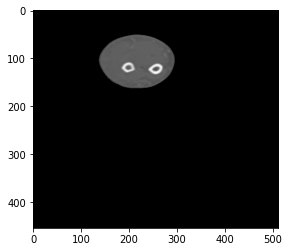

In [190]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(data[:, :, 85], cmap='gray')
plt.gca().set_aspect(ax_aspect)
plt.show()

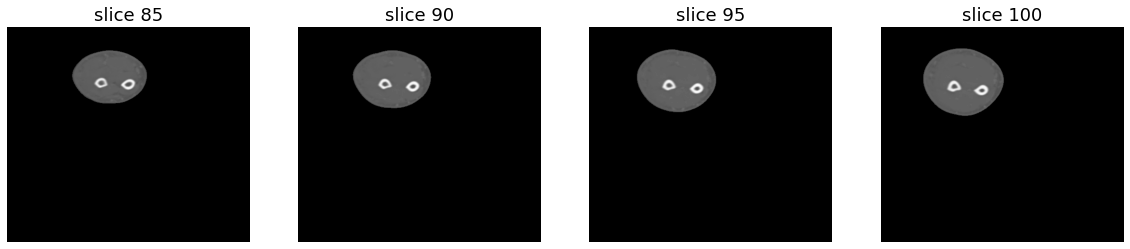

In [246]:
plotct(data, axis=2, aspect=ax_aspect)

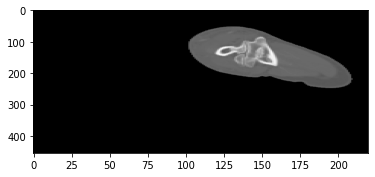

In [218]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(data[:,85,:], cmap='gray')
plt.gca().set_aspect(sag_aspect)
plt.show()

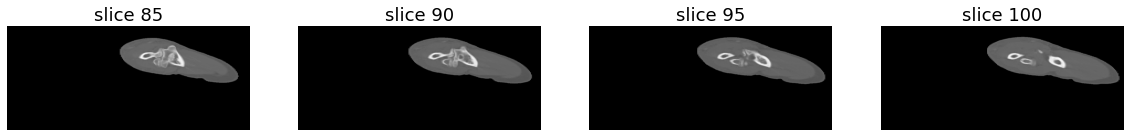

In [247]:
plotct(data, axis=1, aspect=sag_aspect)

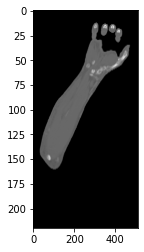

In [220]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(data[85,:,:].T, cmap='gray')
plt.gca().set_aspect(cor_aspect)
plt.show()

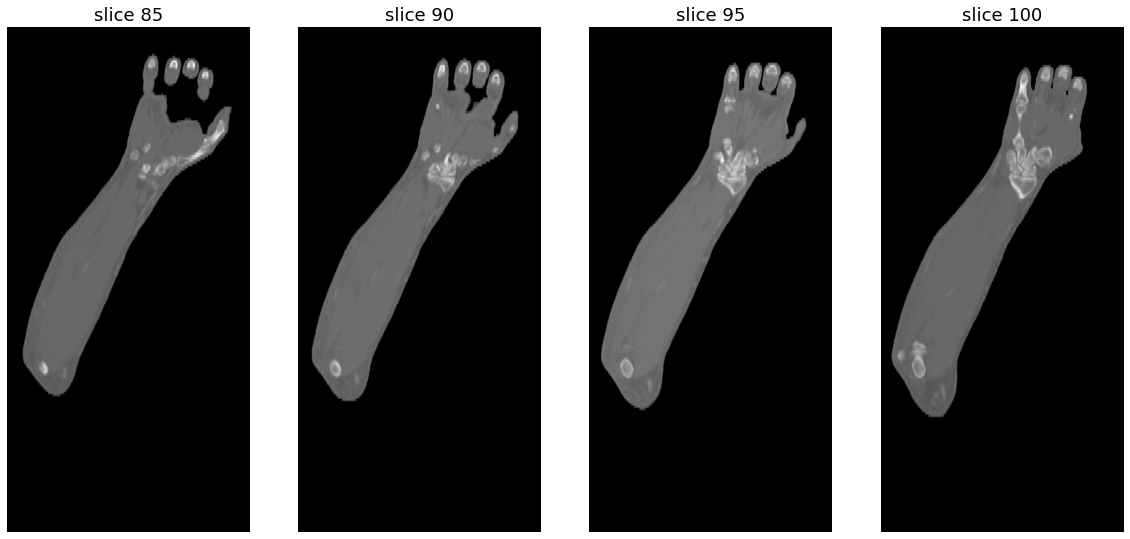

In [248]:
plotct(data, axis=0, aspect = cor_aspect)

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [222]:
# TODO: YOUR CODE
wc = file0.WindowCenter
ww = file0.WindowWidth
ri = file0.RescaleIntercept

print("Window Center: {}\nWindow Width: {}\nRescale Intercept: {}".format(wc,ww,ri))
vmin = wc-ww//2
vmax = wc+ww//2


Window Center: 30
Window Width: 410
Rescale Intercept: -1024


In [26]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

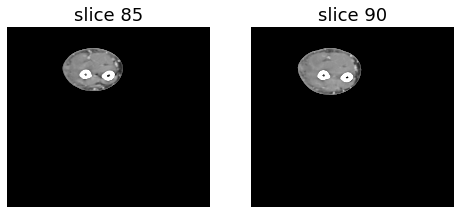

In [249]:
# TODO: YOUR CODE FOR AXIAL
plotct(data, rows=1, cols=2, 
       axis=2, 
       aspect = ax_aspect, 
       intercept=ri, 
       vmin=vmin,vmax=vmax,
       sizex = 8, sizey=8)

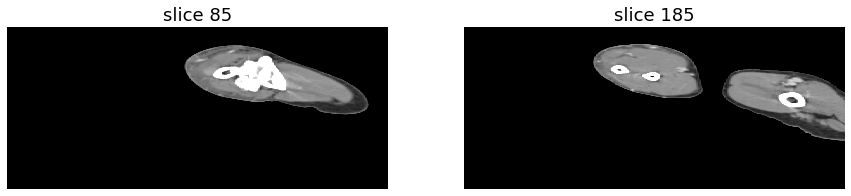

In [253]:
# TODO: YOUR CODE FOR SAGITTAL
plotct(data, rows=1, cols=2, 
       axis=1, 
       aspect = sag_aspect, 
       intercept=ri, 
       vmin=vmin,vmax=vmax,
       sizex = 15, sizey=17,
       show_every = 100)

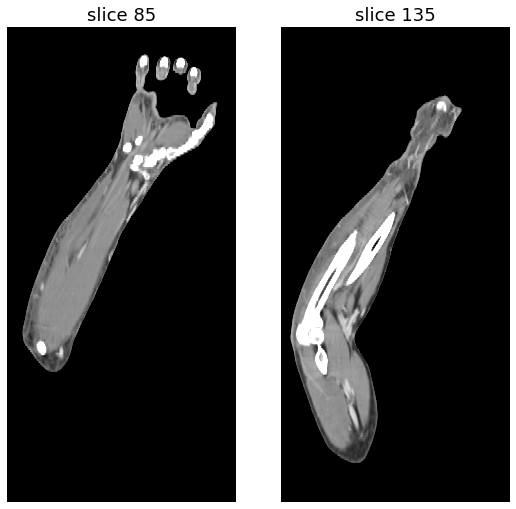

In [259]:
# TODO: YOUR CODE FOR CORONAL
plotct(data, rows=1, cols=2, 
       axis=0, 
       aspect = cor_aspect, 
       intercept=ri, 
       vmin=vmin,vmax=vmax,
       sizex = 9, sizey=9,
       show_every = 50)

In [30]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

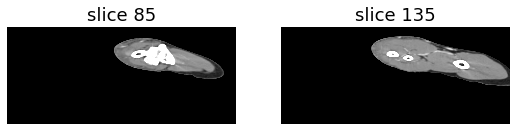

In [265]:
# TODO: YOUR CODE
# soft tissues
wc, ww = 30, 380
vmin = wc-ww//2
vmax = wc+ww//2
plotct(data, rows=1, cols=2, 
       axis=1, 
       aspect = sag_aspect, 
       intercept=ri, 
       vmin=vmin,vmax=vmax,
       sizex = 9, sizey=9,
       show_every = 50)

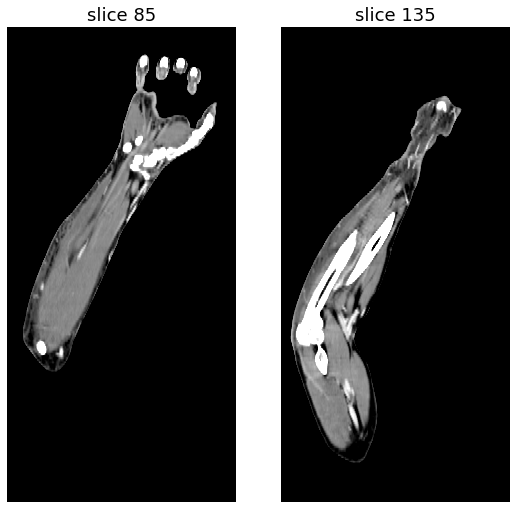

In [263]:
# soft tissues
wc, ww = 50, 250
vmin = wc-ww//2
vmax = wc+ww//2
plotct(data, rows=1, cols=2, 
       axis=0, 
       aspect = cor_aspect, 
       intercept=ri, 
       vmin=vmin,vmax=vmax,
       sizex = 9, sizey=9,
       show_every = 50)

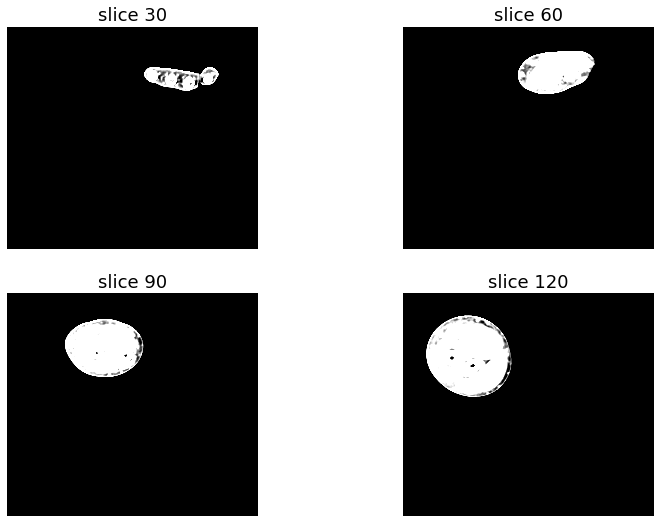

In [281]:
# fat
wc, ww = -50, 100
vmin = wc-ww//2
vmax = wc+ww//2
plotct(data, rows=2, cols=2, 
       axis=2, 
       aspect = ax_aspect, 
       intercept=ri, 
       vmin=vmin,vmax=vmax,
       sizex = 13, sizey=9,
       show_every = 30, start_with = 30)

#not much fat on this scan, since it is black and white (aareas outside the window)

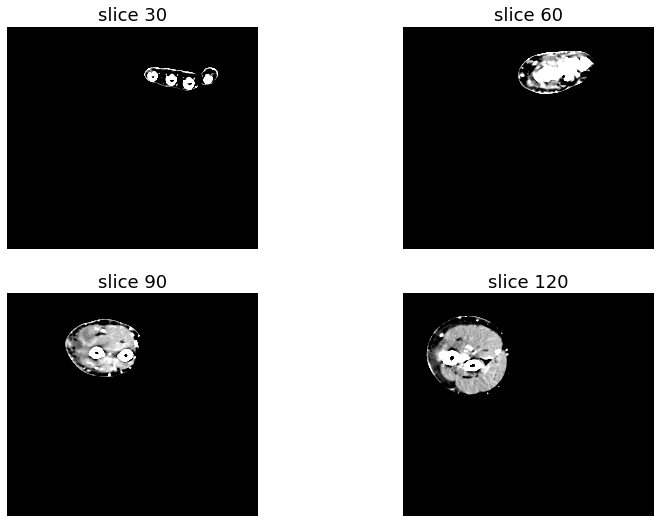

In [282]:
# soft tissue
wc, ww = 40, 80
vmin = wc-ww//2
vmax = wc+ww//2
plotct(data, rows=2, cols=2, 
       axis=2, 
       aspect = ax_aspect, 
       intercept=ri, 
       vmin=vmin,vmax=vmax,
       sizex = 13, sizey=9,
       show_every = 30, start_with = 30)

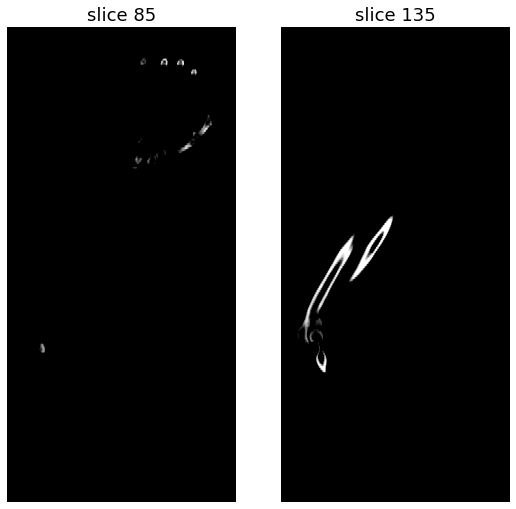

In [287]:
# bones
wc, ww = 1000, 1000
vmin = wc-ww//2
vmax = wc+ww//2
plotct(data, rows=1, cols=2, 
       axis=0, 
       aspect = cor_aspect, 
       intercept=ri, 
       vmin=vmin,vmax=vmax,
       sizex = 9, sizey=9,
       show_every = 50)

#here all soft tissues are below 850 , so they are black
#bones are in the grey range of colors

In [36]:
# Which values make sense and why?

In [37]:
# TODO: YOUR ANSWER


It depends on what type of tissue you want to see, which is measured in Hounsfield units (HU)

* Air = −1000 HU; 
* Water = 0 HU.
* Lung ≈ −500 HU (partially air, partially soft tissue)
* Fat ≈ −50 HU (slightly less dense than simple fluid)
* Water = 0 HU
* Soft tissue (& blood) ≈ +50 HU (slightly more dense than simple fluid)
* Bone ≈ +1000 HU (much more dense) 

Level and Window Width define our window, ct scan will show every tissue, which is inide this window. 

ref: "https://www.kaggle.com/redwankarimsony/ct-scans-dicom-files-windowing-explained"

Because we have a ct scan of an arm, values of center from -50 HU till 1000 HU with an appropriate width will make sense 



**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [329]:
# TODO: YOUR CODE TO SEGMENT FAT
threshold = -50 # based on HU values for tissues
new_mask = data.copy()
new_mask = new_mask.astype(np.int16)
new_mask = np.where(new_mask+ri<threshold,1.0,0.0)

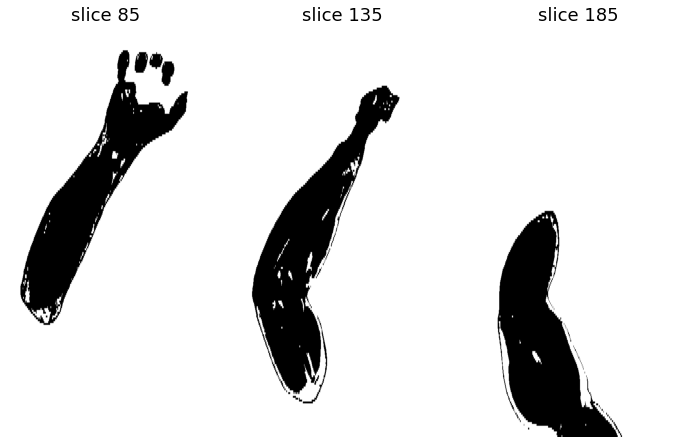

In [330]:
plotct(new_mask, rows=1, cols=3, 
       axis=0, 
       aspect = cor_aspect, 
       intercept=ri, 
       sizex = 12, sizey=29,
       show_every = 50)

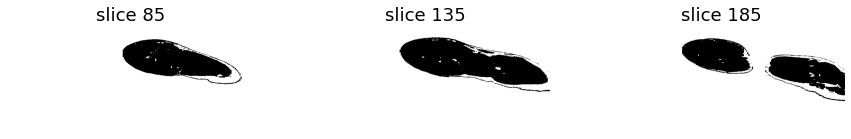

In [331]:
plotct(new_mask, rows=1, cols=3, 
       axis=1, 
       aspect = sag_aspect, 
       intercept=ri, 
       sizex = 15, sizey=29,
       show_every = 50)

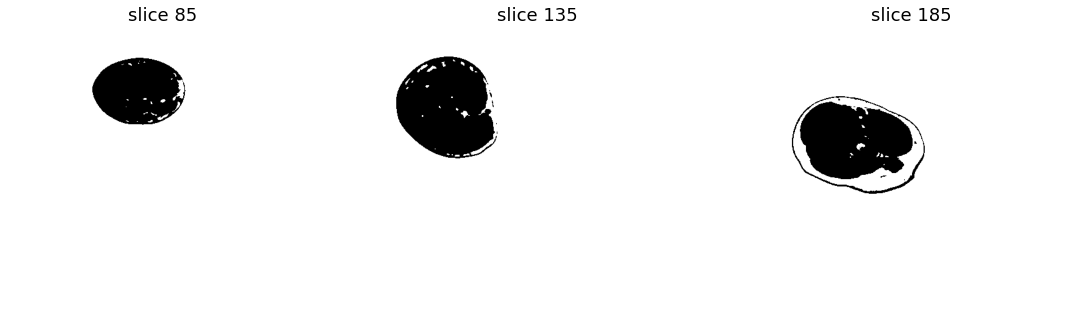

In [332]:
plotct(new_mask, rows=1, cols=3, 
       axis=2, 
       aspect = ax_aspect, 
       intercept=ri, 
       sizex = 19, sizey=29,
       show_every = 50)

In [333]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
threshold = 50 # based on HU values for tissues
new_mask = data.copy()
new_mask = new_mask.astype(np.int16)
new_mask = np.where(new_mask+ri<threshold,1.0,0.0)

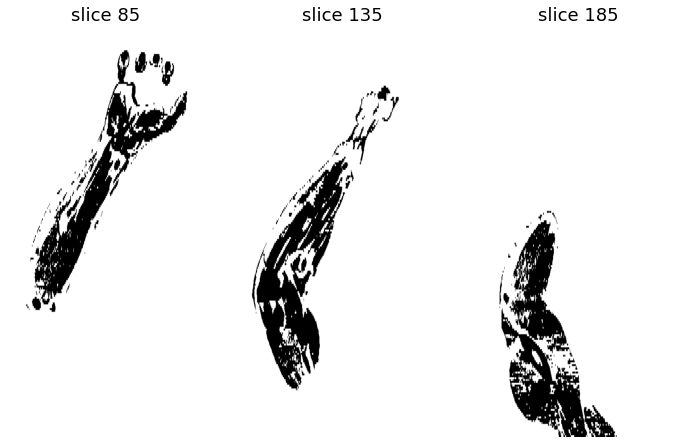

In [334]:
plotct(new_mask, rows=1, cols=3, 
       axis=0, 
       aspect = cor_aspect, 
       intercept=ri, 
       sizex = 12, sizey=29,
       show_every = 50)

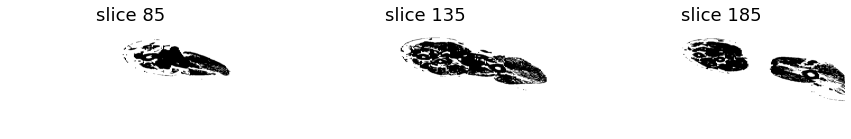

In [335]:
plotct(new_mask, rows=1, cols=3, 
       axis=1, 
       aspect = sag_aspect, 
       intercept=ri, 
       sizex = 15, sizey=29,
       show_every = 50)

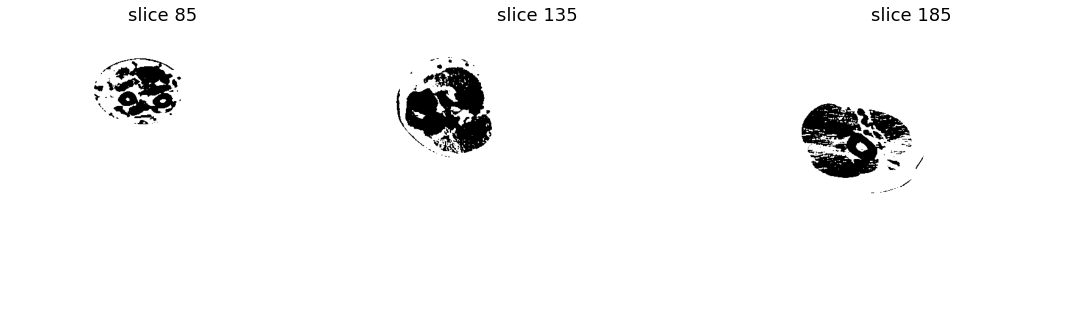

In [336]:
plotct(new_mask, rows=1, cols=3, 
       axis=2, 
       aspect = ax_aspect, 
       intercept=ri, 
       sizex = 19, sizey=29,
       show_every = 50)

In [337]:
# TODO: YOUR CODE TO SEGMENT BONES
threshold = 1000 # based on HU values for tissues
new_mask = data.copy()
new_mask = new_mask.astype(np.int16)
new_mask = np.where(new_mask+ri<threshold,1.0,0.0)

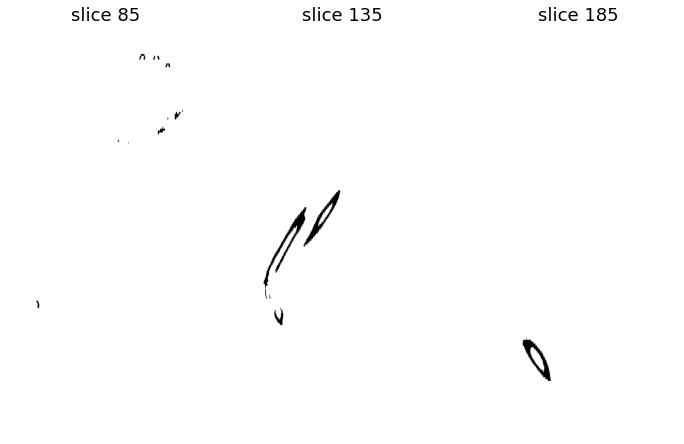

In [338]:
plotct(new_mask, rows=1, cols=3, 
       axis=0, 
       aspect = cor_aspect, 
       intercept=ri, 
       sizex = 12, sizey=29,
       show_every = 50)

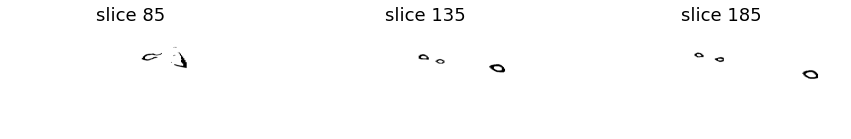

In [339]:
plotct(new_mask, rows=1, cols=3, 
       axis=1, 
       aspect = sag_aspect, 
       intercept=ri, 
       sizex = 15, sizey=29,
       show_every = 50)

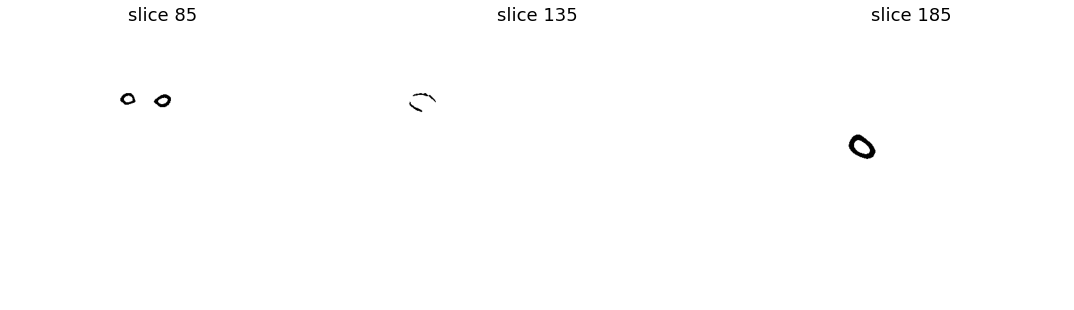

In [340]:
plotct(new_mask, rows=1, cols=3, 
       axis=2, 
       aspect = ax_aspect, 
       intercept=ri, 
       sizex = 19, sizey=29,
       show_every = 50)

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
# Yes

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""